In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # pour la visialisation des données 
import time 

# importer notre dataset

In [2]:
#importer et afficher les lignes de notre dataset  kdd_train
df_train=pd.read_csv('archive/kdd_train.csv')
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [3]:
#importer et afficher les lignes de notre dataset  kdd_test
df_test=pd.read_csv('archive/kdd_test.csv')
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.00,0.0,0.87,0.0,normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.00,0.0,0.00,0.0,normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.00,0.0,0.00,0.0,normal
3,1979,udp,other,SF,145,105,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.00,0.0,0.00,0.0,normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.00,0.0,1.00,1.0,portsweep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.00,0.09,0.0,0.91,1.0,satan
22540,0,tcp,http,SF,254,2277,0,0,0,0,...,255,1.00,0.00,0.04,0.04,0.00,0.0,0.00,0.0,normal
22541,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.07,0.00,0.00,1.00,1.0,0.00,0.0,neptune
22542,0,tcp,private,RSTR,0,0,0,0,0,0,...,1,0.00,0.58,0.57,0.00,0.00,0.0,0.58,1.0,portsweep


In [4]:
# fusionner les deux data set (train et test )
df = pd.concat([df_train, df_test], ignore_index=True)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.00,0.09,0.00,0.91,1.00,satan
148513,0,tcp,http,SF,254,2277,0,0,0,0,...,255,1.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,normal
148514,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
148515,0,tcp,private,RSTR,0,0,0,0,0,0,...,1,0.00,0.58,0.57,0.00,0.00,0.00,0.58,1.00,portsweep


# Analyse descriptive et Préparation du dataset

In [5]:
#afficher les noms des columns de notre dataset
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [6]:
#le nombre total des valeurs manquantes
df.isnull().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [8]:
# séparer les colonnes qui des données catégorielles 
num_cols = df._get_numeric_data().columns
cate_cols = list(set(df.columns)-set(num_cols))

cate_cols

['service', 'protocol_type', 'flag', 'labels']

In [9]:
#les valeur de la classe 'labels'
df['labels'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'apache2', 'mscan', 'httptunnel',
       'processtable', 'mailbomb', 'snmpguess', 'saint', 'snmpgetattack',
       'xsnoop', 'ps', 'xterm', 'sendmail', 'xlock', 'named'],
      dtype=object)

In [10]:
#transformer les valeurs de la colonne 'labels' à la valeur 0 pour 'normal' et 1 pour les autre valeur(attack)  
def change_label(df):
    df['labels'].replace(df['labels'].unique()[1:], 1, inplace=True)
    df['labels'].replace('normal', 0, inplace=True)
change_label(df)
df.labels.unique()

array([0, 1], dtype=int64)

In [11]:
#le nombre de labels qui normal et attack
df.labels.value_counts()

0    78588
1    69929
Name: labels, dtype: int64

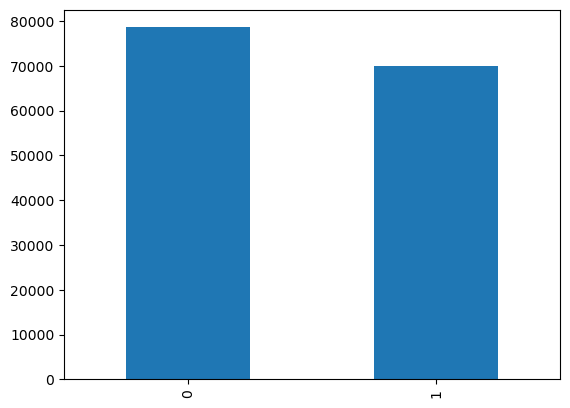

In [12]:
#les valeurs de la classes(labels)  en graphique matplotlib
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")
bar_graph('labels')

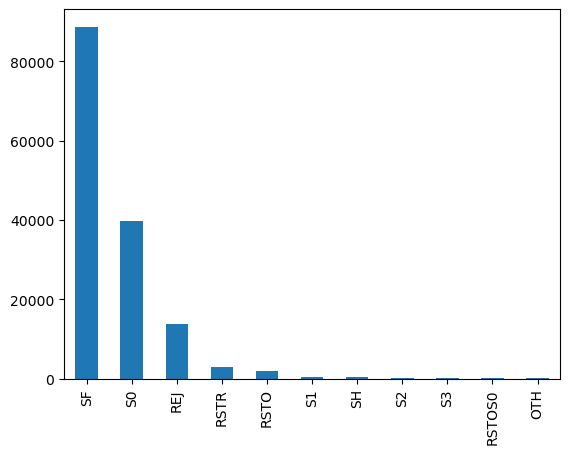

In [13]:
#les valeurs de flag en graphique matplotlib
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")
bar_graph('flag')

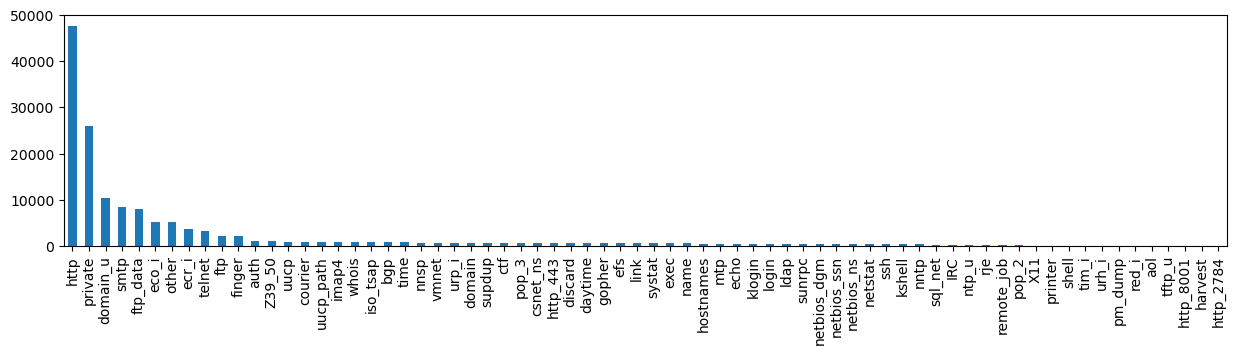

In [14]:
#les valeurs de service en graphique matplotlib
plt.figure(figsize=(15,3))
bar_graph('service')

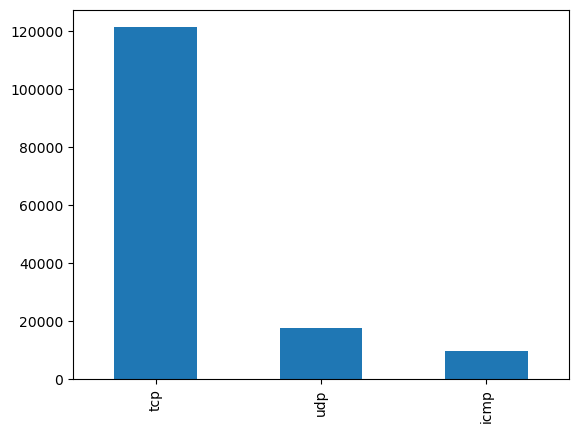

In [15]:
#les valeurs de protocol_type en graphique matplotlib
bar_graph('protocol_type')

In [16]:
# transformer les colonnes catégorielles ("protocol_type", "service" et "flag") en valeurs numériques.
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])

print(df["protocol_type"].value_counts())
print(df["service"].value_counts())
print(df["flag"].value_counts())

1    121197
2     17694
0      9626
Name: protocol_type, dtype: int64
24    47645
49    26038
12    10478
54     8493
20     7927
      ...  
3         3
61        3
27        2
22        2
25        1
Name: service, Length: 70, dtype: int64
9     88748
5     39844
1     13829
4      2910
2      2009
6       411
10      326
7       147
8       128
3       115
0        50
Name: flag, dtype: int64


# La matrice de corrélation

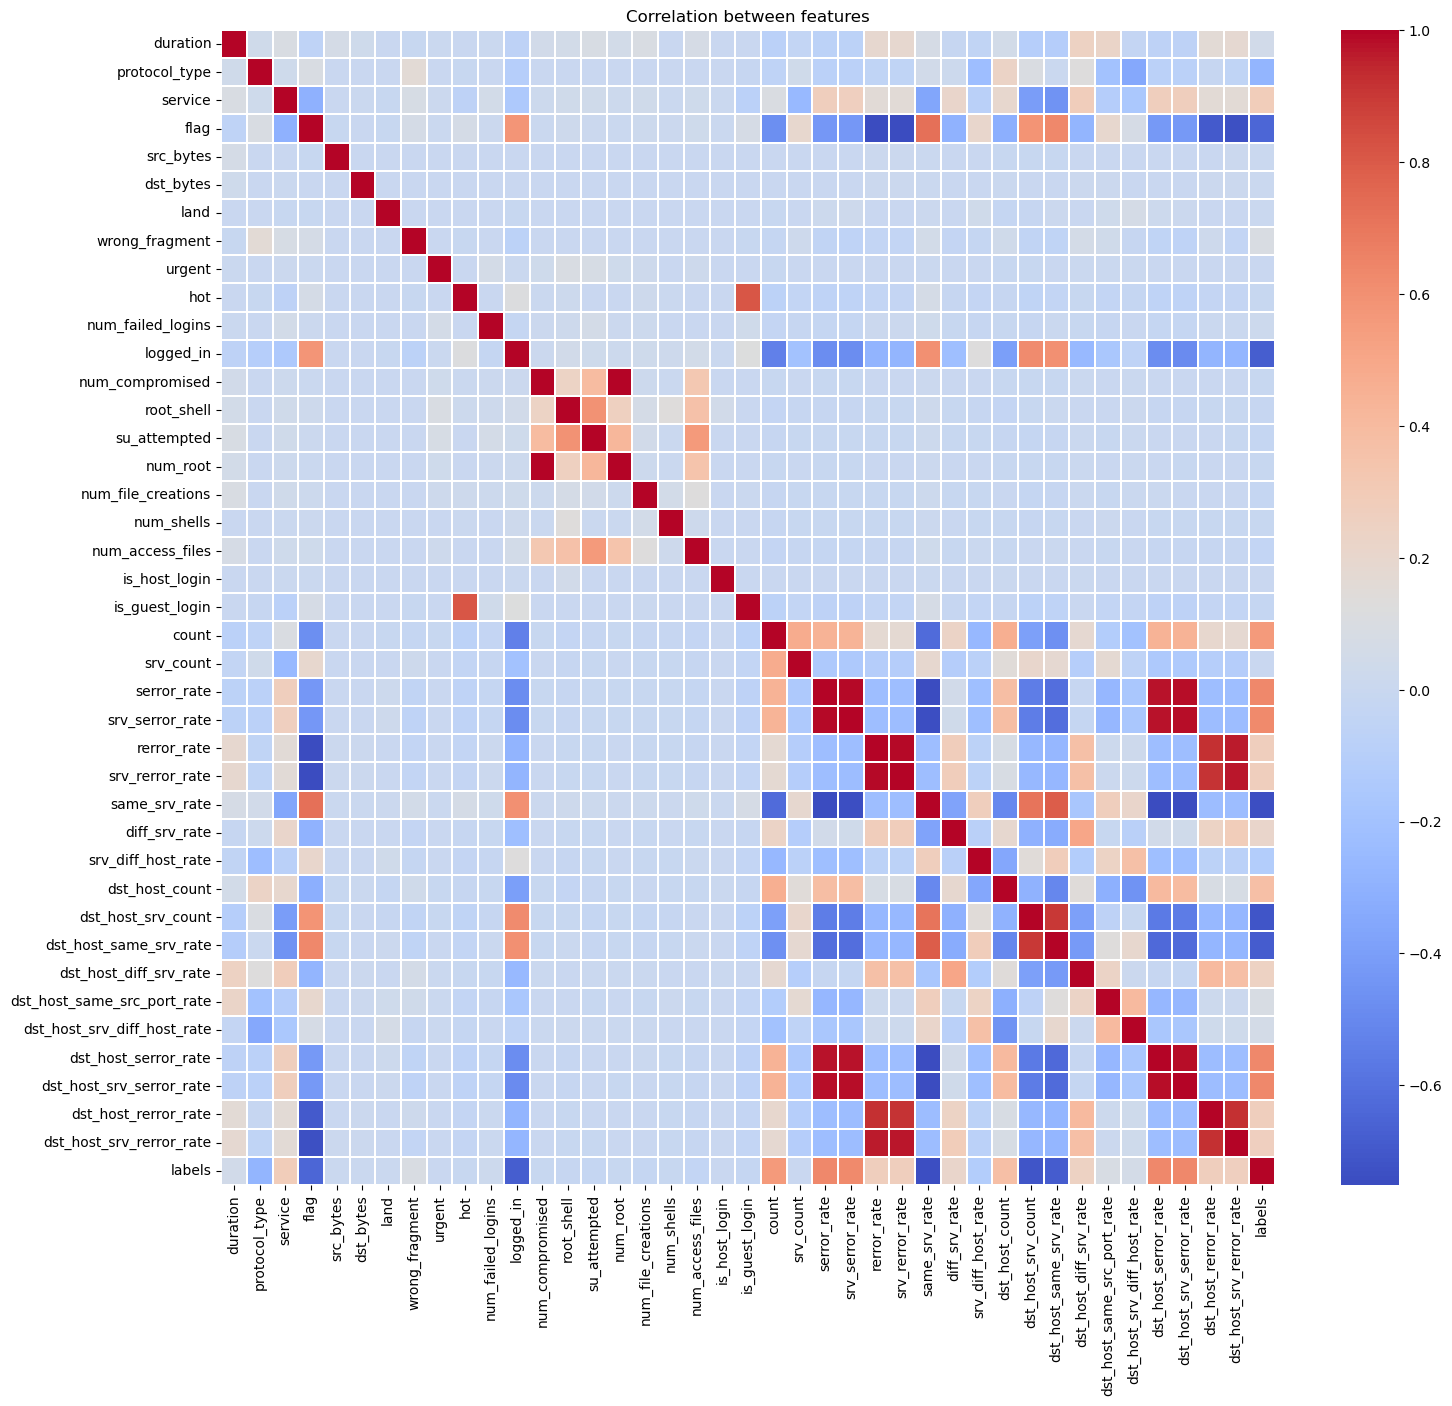

In [17]:
#La matrice de corrélation est utilisée pour évaluer la dépendence entre plusieurs variables en même temps
df = df[[col for col in df if df[col].nunique() > 1]]
corr = df.corr()
fig, ax = plt.subplots(figsize=(17, 15))
sns.heatmap(corr, cmap='coolwarm', ax=ax, linewidths=0.1)
plt.title("Correlation between features")
plt.show()

Text(0.5, 1.0, 'Correlation entre les attributes et le attack')

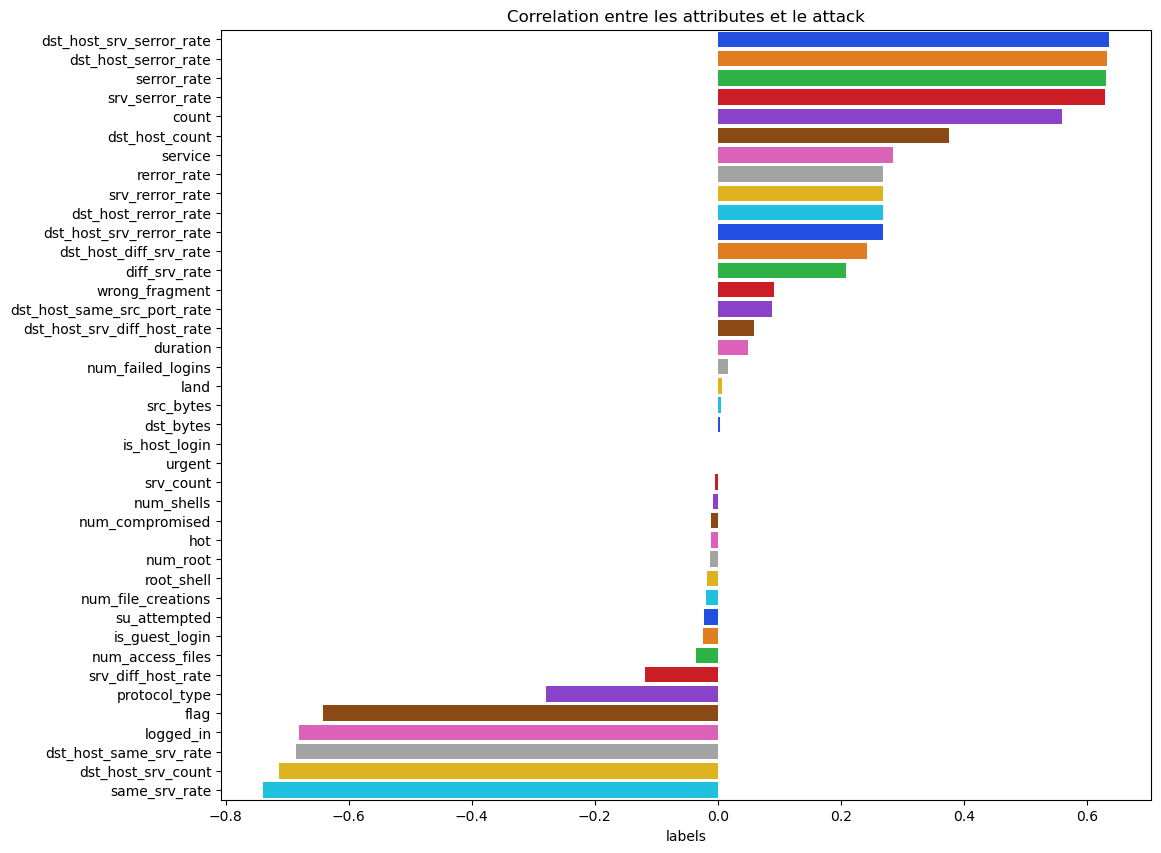

In [18]:
#La corrélation entre les attributs et la target (labels)
plt.figure(figsize=(12, 10))
corr = df.corr()
corr = corr.labels
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation entre les attributes et le attack")

In [19]:
#division des données en attributs (X) et la target (y) 
X=df.drop('labels',axis=1)
y=df['labels']  

la méthode Recursive Feature Elimination (RFE) pour sélectionner les caractéristiques (features) les plus importantes à partir 
des attributs X par rapport à la cible y. Il utilise un classificateur d'arbre de décision (DecisionTreeClassifier)

In [20]:
#,n_features_to_select=10
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier())
rfe.fit(X,y)

for i,col in zip(range(X.shape[1]),X.columns):
    f"{col}  selected={rfe.support_[i]} rank={rfe.ranking_[i]}"

    f=X.loc[:,rfe.support_]
f.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'num_failed_logins', 'logged_in', 'count',
       'rerror_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate'],
      dtype='object')

In [19]:
selected_columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'num_failed_logins', 'logged_in', 'count',
       'srv_count', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate','labels']

# Créer un nouveau DataFrame avec seulement les colonnes(20 avec la class labels) sélectionnées par RFE
df = df[selected_columns]

# Afficher les premières lignes du nouveau DataFrame
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,hot,num_failed_logins,logged_in,count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,labels
0,0,1,20,9,491,0,0,0,0,2,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0
1,0,2,44,9,146,0,0,0,0,13,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0
2,0,1,49,5,0,0,0,0,0,123,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,1
3,0,1,24,9,232,8153,0,0,1,5,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0
4,0,1,24,9,199,420,0,0,1,30,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,1,49,1,0,0,0,0,0,395,...,255,1,0.00,1.00,0.00,0.00,0.09,0.00,0.91,1
148513,0,1,24,9,254,2277,0,0,1,2,...,27,255,1.00,0.00,0.04,0.04,0.00,0.00,0.00,0
148514,0,1,49,5,0,0,0,0,0,202,...,255,25,0.10,0.07,0.00,0.00,1.00,1.00,0.00,1
148515,0,1,49,4,0,0,0,0,0,2,...,255,1,0.00,0.58,0.57,0.00,0.00,0.00,0.58,1


# Séléction des features

In [20]:
X=df.drop('labels',axis=1)
y=df['labels']  

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [23]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Diviser les données d’essai et de train 
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(111387, 20) (37130, 20)
(111387,) (37130,)


# Decision Tree

In [45]:
model_DT = DecisionTreeClassifier(max_depth=3)


start_time = time.time()
# entrainer le modele
model_DT.fit(X_train, Y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)
start_time = time.time()

# predicter le model utilisant 'X_test'
pred = model_DT.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)
f1_DT= f1_score(Y_test,pred, average='micro')
print('F1:',f1_DT)
print(classification_report(Y_test,pred))

Training time:  0.27584218978881836
Testing time:  0.004997730255126953
F1: 0.9454618906544573
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     19645
           1       0.95      0.93      0.94     17485

    accuracy                           0.95     37130
   macro avg       0.95      0.94      0.95     37130
weighted avg       0.95      0.95      0.95     37130



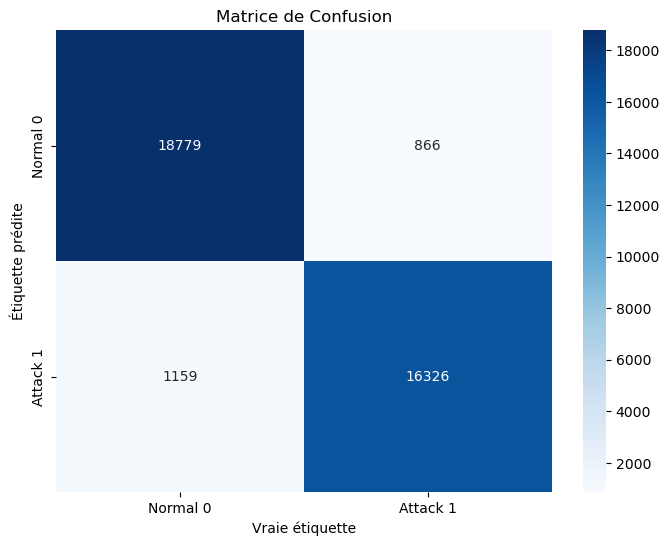

In [46]:
#matrice de confusion utilise pour évaluer les performances de modèle Decision Tree
cm = confusion_matrix(Y_test,pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal 0', 'Attack 1'], 
            yticklabels=['Normal 0', 'Attack 1'])
plt.xlabel('Vraie étiquette')
plt.ylabel('Étiquette prédite')
plt.title('Matrice de Confusion')
plt.show()

# KNN

In [38]:
# Créer une instance du modèle KNN avec le nombre de voisins souhaité (par exemple, 20 voisins)
model_knn = KNeighborsClassifier(n_neighbors=20)


# Entraîner le modèle
start_time = time.time()
model_knn.fit(X_train, Y_train)
end_time = time.time()
print("Training time: ", end_time - start_time)

# Prédire les étiquettes de classe pour les données de test 
start_time = time.time()
Y_test_pred_knn = model_knn.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time - start_time)
f1_KNN= f1_score(Y_test,Y_test_pred_knn, average='micro')
print('F1:',f1_KNN)
print(classification_report(Y_test,Y_test_pred_knn))

Training time:  0.017992258071899414
Testing time:  15.444145679473877
F1: 0.9893617021276596
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19645
           1       0.99      0.99      0.99     17485

    accuracy                           0.99     37130
   macro avg       0.99      0.99      0.99     37130
weighted avg       0.99      0.99      0.99     37130



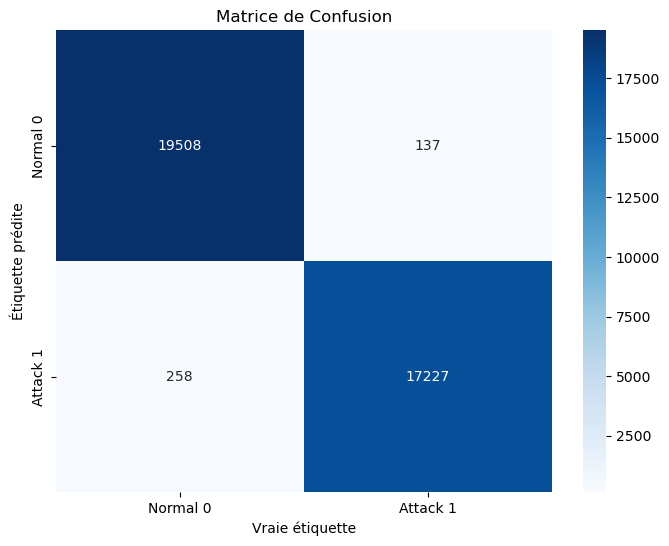

In [39]:
##matrice de confusion utilise pour évaluer les performances de modèle KNN
cm = confusion_matrix(Y_test, Y_test_pred_knn)

# Afficher la matrice de confusion en utilisant seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal 0', 'Attack 1'], 
            yticklabels=['Normal 0', 'Attack 1'])
plt.xlabel('Vraie étiquette')
plt.ylabel('Étiquette prédite')
plt.title('Matrice de Confusion')
plt.show()

# Comparaison entre les modèles

In [40]:
models = ['DT','KNN']
F1_scores = [f1_DT,f1_KNN]
print("Models\tAccuracy\n")
for i in range(2):
    print(str(models[i]) + "\t" + str(F1_scores[i]),end='\n')

Models	Accuracy

DT	0.966765418798815
KNN	0.9893617021276596



------------>Nous décidons à partir du graphique à barres que le meilleur modèle est KNN<------------


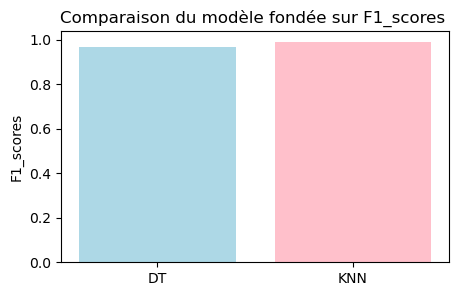

In [41]:
#------------>Trouver le meillleur algorithme utilisant f1-score<----------
print("\n------------>Nous décidons à partir du graphique à barres que le meilleur modèle est KNN<------------")
plt.rcParams['figure.figsize'] = (5,3)
plt.bar(models, F1_scores, color=['lightblue', 'pink', 'lightgreen', 'cyan','red','yellow','purple','orange','brown'])
plt.ylabel("F1_scores")
plt.title("Comparaison du modèle fondée sur F1_scores ")
plt.show()

In [42]:
#appliquer KNN sur notre dataset
classifier=KNeighborsClassifier(n_neighbors=20)
classifier.fit(X,y)

KNeighborsClassifier(n_neighbors=20)

In [43]:
import pickle

In [44]:
#enregestrer le modele
pickle.dump(classifier,open('model.pkl','wb'))